# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [105]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [98]:
df = pd.read_csv('agaricus-lepiota.data')
X = pd.get_dummies(df)

In [99]:
sse = []
krange = range(2,30)
for i in krange:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels = kmeans.labels_
    sse.append(kmeans.inertia_)

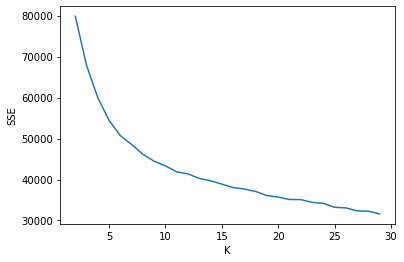

In [100]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(krange, sse)

In [101]:
#Ser ut som 8 clusters passer mht albue
kmeans = KMeans(n_clusters=8)
y_kmeans = kmeans.fit_predict(X)
clusters = kmeans.cluster_centers_

In [118]:
pca_scores = []
pca = PCA(n_components=len(X.columns))
pca.fit(X)
for i in range(len(X.columns)-1):
	pca_scores.append(sum(pca.explained_variance_[0:i]))

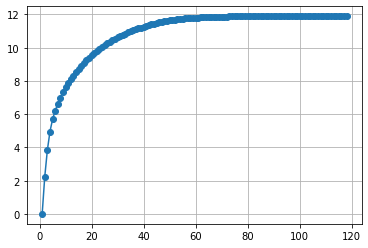

In [120]:
plt.plot(np.arange(1,len(X.columns)), pca_scores, marker='o')
plt.grid()

In [126]:
pca = PCA(n_components=20)
x_new = pca.fit_transform(X)
labels = KMeans(n_clusters=8).fit_predict(x_new)

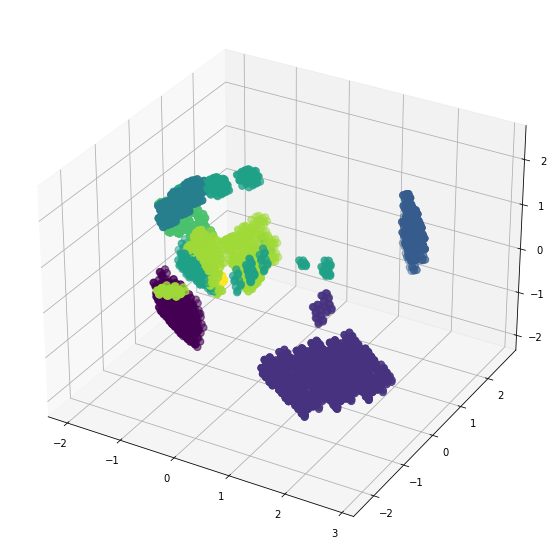

In [127]:
pca = PCA(n_components=3)
x_plot = np.array(pca.fit_transform(X))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50, cmap='viridis')